In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

from sklearn.metrics import accuracy_score

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = 'data/car_evaluation_processed.csv'
df = pd.read_csv(data)

In [24]:
df.head()

,buying,meant,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
# X and y
X = df.drop(['class'], axis=1)

y = df['class']

In [26]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [28]:
# Encoding the features with OrdinalEncoder

oe = ce.OrdinalEncoder(cols=['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety'])
X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

In [29]:
X_train_encoded.head()

,buying,meant,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


Training a model using a Decision Tree Classifier

In [34]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dtc.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
# A few predictions
y_pred = dtc.predict(X_test_encoded)
y_pred[:3]

array(['unacc', 'acc', 'unacc'], dtype=object)

Model performance

In [40]:
# y_pred.shape, y_test.shape

((5,), (346,))

In [42]:
# using accuracy score
accuracy = accuracy_score(y_pred, y_test)
print("Model's performance on entropy criterion:", accuracy)

Model's performance on entropy criterion: 0.8179190751445087


Model visualization

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'entropy = 1.693\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

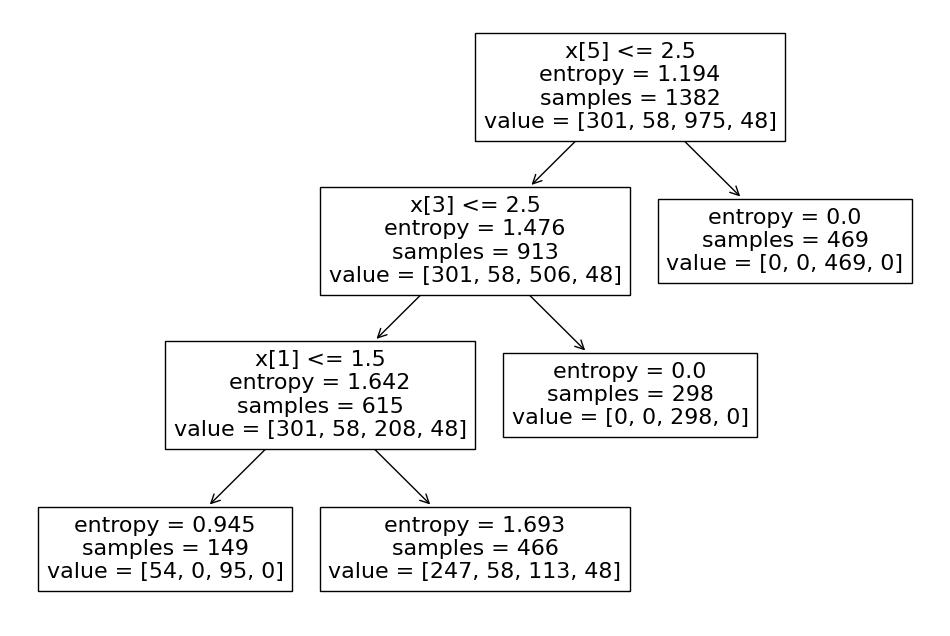

In [44]:
plt.figure(figsize=(12, 8))
from sklearn import tree
tree.plot_tree(dtc.fit(X_train_encoded, y_train))